## Bibliotecas

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format='svg'


## Leitura do Dataset

In [60]:
dataset = pd.read_csv('/Users/jeanlima/Documents/GitHub/ElectricCurrentRecognition/CreatingDataset/ElectricCurrentDataset.txt')
dataset.head()

0     1     2     3     4     5     6     7     8     9    ...      291  \
0  0.00 -0.18 -0.25  0.14  0.18 -0.14  0.07 -0.25 -0.04 -0.07    ...     1.98   
1  0.07 -0.07  0.07  0.00  0.04 -0.07  0.14 -0.07  0.00  0.32    ...     0.11   
2  0.07  0.04 -0.28  0.00  0.14 -0.25 -0.07  0.07 -0.04  0.11    ...     0.00   
3  0.00  0.00  0.00 -0.18  0.60  1.42  2.23  1.84  1.66  1.24    ...    -0.46   
4  1.59  1.42  1.20  1.35  1.31  1.10  0.60  0.18  0.00 -0.04    ...    -0.07   

    292   293   294   295   296   297   298   299    Device  
0  1.49  1.17  1.17  1.20  1.03  0.81  0.46  0.32  Notebook  
1  0.21  0.11 -0.04 -0.07  0.14  0.14  0.11  0.04  Notebook  
2  0.14 -0.18  0.07 -0.28  0.11 -0.04  0.14 -0.11  Notebook  
3 -0.25 -0.07  0.11  0.28 -0.07  0.00  0.32 -0.21  Notebook  
4 -0.04  0.14  0.11 -0.07  0.14  0.18 -0.14 -0.11  Notebook  

[5 rows x 301 columns]

### Classes do dataset

In [33]:
classes=[]
for i in dataset['Device']:
    if i not in classes:
        classes.append(i)

for classe in classes:
    print(classe)

Notebook
Ventilador
Geladeira
Microondas


## Conjunto de Dados

### 1) Device = Notebook

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


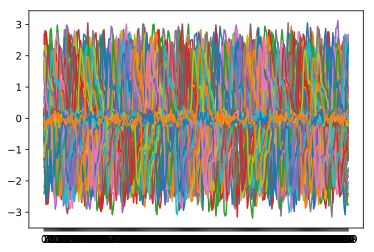

In [112]:
conjunto_notebook = dataset[dataset['Device']=='Notebook']
conjunto_notebook.drop(['Device'], axis=1, inplace=True)
for i in range(len(conjunto_notebook)):
    plt.plot(conjunto_notebook.loc[i])
plt.show()

### 2) Device = Ventilador

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


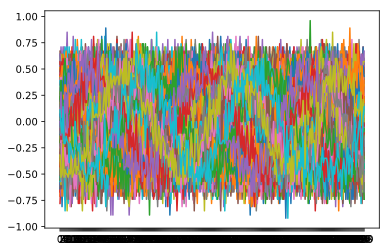

In [113]:
conjunto_ventilador = dataset[dataset['Device']=='Ventilador']
conjunto_ventilador.drop(['Device'], axis=1, inplace=True)
for i in range(len(conjunto_ventilador)):
    plt.plot(conjunto_ventilador.loc[i+len(conjunto_notebook)])
plt.show()

### 3) Device = Geladeira

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


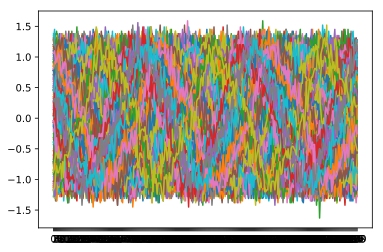

In [114]:
conjunto_geladeira = dataset[dataset['Device']=='Geladeira']
conjunto_geladeira.drop(['Device'], axis=1, inplace=True)
for i in range(len(conjunto_geladeira)):
    plt.plot(conjunto_geladeira.loc[i+len(conjunto_notebook)+len(conjunto_ventilador)])
plt.show()

### 4) Device = Microondas

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


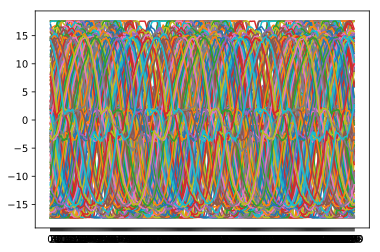

In [115]:
conjunto_microondas = dataset[dataset['Device']=='Microondas']
conjunto_microondas.drop(['Device'], axis=1, inplace=True)
for i in range(len(conjunto_microondas)):
    plt.plot(conjunto_microondas.loc[i+len(conjunto_notebook)+len(conjunto_ventilador)+len(conjunto_geladeira)])
plt.show()

## Partição Holdout 70/30

In [61]:
y = dataset['Device']
dataset.drop(['Device'], axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size=0.30)

## Treinamento knn; k=5

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Teste do modelo

In [63]:
previsaokNN = knn.predict(X_test)

## Métricas de Desempenho

### Matriz de Confusão

In [64]:
print(confusion_matrix(Y_test, previsaokNN))

[[48  0  0  0]
 [ 0 69  0  0]
 [ 0  0 66  0]
 [ 0  0  0 58]]


### Acurácia

In [65]:
accuracy_score(Y_test, previsaokNN)

1.0

### Comparação entre Vizinhos

In [81]:
amostra = X_test.loc[310]
distancias = knn.kneighbors_graph([amostra], mode='distance', n_neighbors=2)
matriz_distancias = distancias.toarray()

#### Gráfico Amostra + Vizinhos

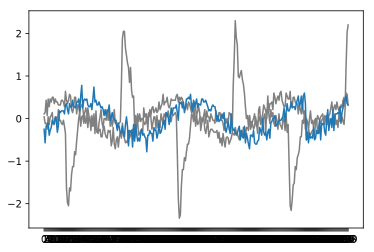

In [83]:
lista_pos_vizinhos=[]

for x in range(len(matriz_distancias)):
    for y in range(len(matriz_distancias[x])):
        if matriz_distancias[x][y] != 0.0:
            lista_pos_vizinhos.append(y)
            
for i in range(len(lista_pos_vizinhos)):
    plt.plot(X_train.loc[lista_pos_vizinhos[i]], color='gray')

plt.plot(amostra)
plt.show()

#### Grafo de Distâncias

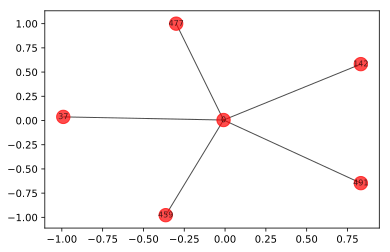

  (0, 491)	3.112362446759694
  (0, 459)	3.2663435214318794
  (0, 477)	3.4453737097737314
  (0, 142)	3.4866889737973468
  (0, 37)	3.7960637507818547


In [56]:
g = nx.Graph()

for x in range(len(matriz_distancias)):
    for y in range(len(matriz_distancias[x])):
        if matriz_distancias[x][y] != 0.0:
            g.add_weighted_edges_from([(x,y,matriz_distancias[x][y])])
 
nx.draw_networkx(g,alpha=0.7, font_size=8, node_size=180)
plt.show()

print(distancias)